In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

In [2]:
def accuracy(file_name, tasknum = 10):
    acc = np.zeros(tasknum)
    with open(file_name, 'r') as f:
        data = f.read().splitlines()
        for i in range(len(data)):
            acc[i] = data[i]
    return acc

In [3]:
seed_num = 1
strategy_arr = ['RingBuffer']
ft_Imagenet = {}
name = 'FT_Imagenet_{}_{}_memsz_20000_base_100_batch_128_epoch_100_factor_4_{}_Soft.txt'
tasknum = 10
for approach in ['coreset']:
    ft_Imagenet[approach] = {}
    for strategy in strategy_arr:
        ft_Imagenet[approach][strategy] = np.zeros((seed_num, tasknum))
        for seed in range(seed_num):
            ft_Imagenet[approach][strategy][seed] = accuracy(name.format(approach,seed,strategy), tasknum=tasknum)
            

In [4]:
seed_num = 1
strategy_arr = ['RingBuffer']
ft_test_Imagenet = {}
name = 'FT_Imagenet_{}_{}_memsz_20000_alpha_10_base_100_batch_128_epoch_100_factor_4_{}_Soft.txt'
tasknum = 10
for approach in ['coreset']:
    ft_test_Imagenet[approach] = {}
    for strategy in strategy_arr:
        ft_test_Imagenet[approach][strategy] = np.zeros((seed_num, tasknum))
        for seed in range(seed_num):
            ft_test_Imagenet[approach][strategy][seed] = accuracy(name.format(approach,seed,strategy), tasknum=tasknum)
            

[85. 82. 75. 68. 63. 58. 54. 50. 47. 45.]
60.22222222222222


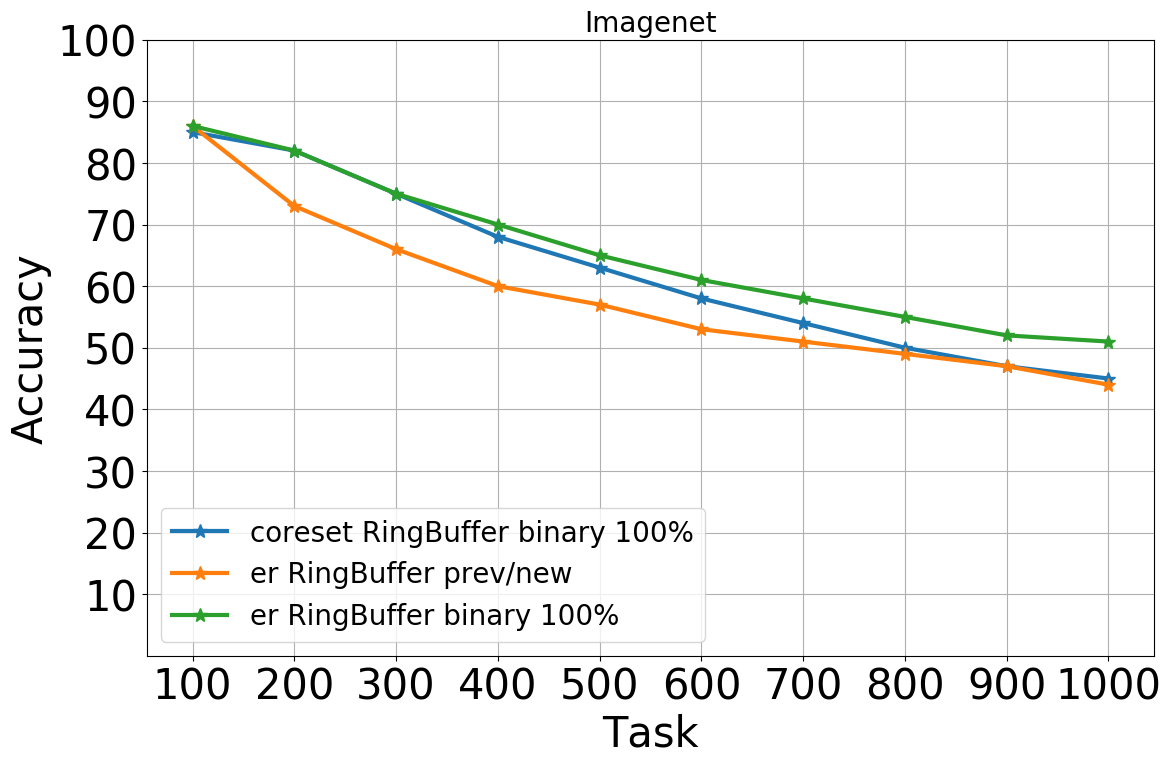

In [5]:
er_prev_new = [86, 73, 66, 60, 57, 53, 51, 49, 47, 44]
er_prev_new_binary_100 = [86, 82, 75, 70, 65, 61, 58, 55, 52, 51]
task = (np.arange(10) + 1)*100

plt.style.use('default')
plt.figure(figsize=(13,8))
# plt.plot(task, ft_Imagenet['coreset']['RingBuffer'].mean(axis=0)[:9], linestyle='-', label='coreset RingBuffer all',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, ft_test_Imagenet['coreset']['RingBuffer'].mean(axis=0), linestyle='-', label='coreset RingBuffer binary 100%',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, er_prev_new, linestyle='-', label='er RingBuffer prev/new',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, er_prev_new_binary_100, linestyle='-', label='er RingBuffer binary 100%',marker = line_markers[0], linewidth=3, markersize=10)

plt.grid(b=True, which='major', axis='both')
plt.xticks([100,200,300,400,500,600,700,800,900,1000], fontsize = 30)

plt.xlabel('Task', fontsize=30)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim(0,100)
plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize = 30)
# plt.set_yticklabels(['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('Imagenet', fontsize = 20)
plt.legend(loc = 'lower left', fontsize=20)

print(ft_test_Imagenet['coreset']['RingBuffer'].mean(axis=0))
print(ft_test_Imagenet['coreset']['RingBuffer'].mean(axis=0)[1:].sum()/9)

In [6]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_10_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_prev_new.mat')
print(result.keys())
print('Batch: 32')
print('Soft')
print(result['soft'])
print('stat')
print(result['stat'])
true_acc = []
for i in range(len(result['stat'])):
    true_acc.append(int(100.*(result['stat'][i][0]+result['stat'][i][3])/result['stat'][i][6]))
print('True accuracy')
print(true_acc)
print((sum(true_acc))/9)
print('task_soft')
print(result['task_soft'])

dict_keys(['__header__', '__version__', '__globals__', 'soft', 'stat', 'sigmoid', 'auroc', 'task_soft'])
Batch: 32
Soft
[[86 82 75 70 65 61 58 55 52 51]]
stat
[[ 3422   435  1143  3920   587   493 10000]
 [ 5926  1644  2430  3984   526   490 15000]
 [ 8181  3149  3670  3946   495   559 20000]
 [10503  5330  4167  3789   387   824 25000]
 [12333  7729  4938  3768   332   900 30000]
 [14061 10289  5650  3799   305   896 35000]
 [15828 12832  6340  3773   286   941 40000]
 [17624 16096  6280  3535   318  1147 45000]
 [18492 18021  8487  3807   241   952 50000]]
True accuracy
[73, 66, 60, 57, 53, 51, 49, 47, 44]
55.55555555555556
task_soft
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [82. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 77. 84.  0.  0.  0.  0.  0.  0.  0.]
 [79. 75. 77. 84.  0.  0.  0.  0.  0.  0.]
 [79. 74. 76. 78. 84.  0.  0.  0.  0.  0.]
 [77. 74. 75. 76. 77. 85.  0.  0.  0.  0.]
 [77. 73. 74. 75. 75. 78. 85.  0.  0.  0.]
 [77. 73. 74. 74. 74. 75. 79. 86.  0.  0.]
 [77. 73. 73

In [7]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_prev_new_uniform_penalty.mat')
print(result.keys())
print('Batch: 64, Replay batch: 32, factor: 4, prev/new, uniform penalty')
print('Cheat Top-1')
print(result['cheat']['correct'][0][0][0])
print('All Top-1')
print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

print('Cheat Top-5')
print(result['cheat']['correct_5'][0][0][0])
print('All Top-5')
print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print('All')
print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 64, Replay batch: 32, factor: 4, prev/new, uniform penalty
Cheat Top-1
[85 80 71 65 60 54 51 48 44 43]
All Top-1
[85 57 54 49 47 43 41 39 36 35]
Cheat Top-5
[96 94 91 87 84 80 77 75 72 70]
All Top-5
[96 86 83 79 75 73 71 68 66 64]
Sigmoid
[73.35       69.34666667 67.675      63.4        58.52       59.56
 59.71       60.62444444 56.01      ]
AUROC
[0.84016964 0.83970438 0.83089481 0.80909417 0.80980154 0.82283891
 0.8276699  0.80524161 0.81767457]
Stat
All
[[ 3938  1033    29  1797    71  3132 10000]
 [ 6666  3287    47  1500    37  3463 15000]
 [ 9054  5904    42   841    35  4124 20000]
 [11010  8953    37   753    14  4233 25000]
 [12333 12607    60   862    12  4126 30000]
 [13811 16142    47   595     8  4397 35000]
 [15075 19892    33   529     6  4465 40000]
 [16216 23765    19   415     4  4581 45000]
 [17356 27627    17   197     

In [8]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_4_RingBuffer_prev_new_uniform_penalty.mat')
print(result.keys())
print('Batch: 128, Replay batch: 64, factor:4, prev/new, uniform penalty')
print('Cheat Top-1')
print(result['cheat']['correct'][0][0][0])
print('All Top-1')
print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

print('Cheat Top-5')
print(result['cheat']['correct_5'][0][0][0])
print('All Top-5')
print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print('All')
print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
print(result['task_soft_1'])




dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 64, factor:4, prev/new, uniform penalty
Cheat Top-1
[86 82 74 68 64 59 55 52 49 47]
All Top-1
[86 58 57 52 50 47 44 43 40 38]
Cheat Top-5
[96 95 91 88 85 81 79 77 74 72]
All Top-5
[96 86 84 79 76 74 73 70 68 66]
Sigmoid
[80.96       78.99333333 78.71       77.108      73.22333333 72.19428571
 76.405      73.03333333 72.454     ]
AUROC
[0.90022336 0.89408229 0.88354446 0.86761724 0.8618843  0.86964315
 0.8754784  0.8572     0.86670491]
Stat
All
[[ 4060   918    22  1797    71  3132 10000]
 [ 7045  2910    45  1607    42  3351 15000]
 [ 9645  5316    39   787    43  4170 20000]
 [11982  7998    20   567     5  4428 25000]
 [13676 11291    33   655     5  4340 30000]
 [15170 14804    26   545     6  4449 35000]
 [16828 18158    14   374     2  4624 40000]
 [18067 21911    22   380     1  4619 45000]
 [19359 25633     8   12

In [9]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_1_base_100_replay_128_batch_128_epoch_100_factor_4_RingBuffer_prev_new_uniform_penalty.mat')
print(result.keys())
print('Batch: 128, Replay batch: 128, factor:4, prev/new, uniform penalty')
print('Cheat Top-1')
print(result['cheat']['correct'][0][0][0])
print('All Top-1')
print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

print('Cheat Top-5')
print(result['cheat']['correct_5'][0][0][0])
print('All Top-5')
print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print('All')
print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 128, factor:4, prev/new, uniform penalty
Cheat Top-1
[85 80 71]
All Top-1
[85 51 51]
Cheat Top-5
[96 94 89]
All Top-5
[96 84 81]
Sigmoid
[66.58 60.46]
AUROC
[0.78639242 0.7890281 ]
Stat
All
[[ 4011   979    10  1109    40  3851 10000]
 [ 6682  3296    22   974    27  3999 15000]]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 81.  0.  0.  0.  0.  0.  0.  0.  0.]
 [76. 73. 81.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [10]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_prev_new.mat')
print(result.keys())
print('Batch: 128, Replay Batch: 32 prev/new factor: 5')
print('Cheat Top-1')
print(result['cheat']['correct'][0][0][0])
print(sum(result['cheat']['correct'][0][0][0][1:10])/9)
print('All Top-1')
print(result['all']['correct'][0][0][0])
print(sum(result['all']['correct'][0][0][0][1:10])/9)
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

print('Cheat Top-5')
print(result['cheat']['correct_5'][0][0][0])
print('All Top-5')
print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

print('Stat')

print('All')
print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
print(result['task_soft_1'])
print(result['task_soft_5'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay Batch: 32 prev/new factor: 5
Cheat Top-1
[85 83 75 70 66 62 58 55 53 51]
63.666666666666664
All Top-1
[85 74 67 61 58 54 52 50 48 46]
56.666666666666664
Cheat Top-5
[96 95 92 89 87 84 82 80 78 76]
All Top-5
[96 92 88 85 83 81 79 77 75 73]
Stat
All
[[ 3513   463  1024  3924   540   536 10000]
 [ 6179  1709  2112  3917   515   568 15000]
 [ 8558  3299  3143  3825   489   686 20000]
 [10848  5642  3510  3670   359   971 25000]
 [12857  8136  4007  3633   279  1088 30000]
 [14681 10777  4542  3654   281  1065 35000]
 [16442 13582  4976  3609   227  1164 40000]
 [18429 16781  4790  3273   228  1499 45000]
 [19512 19170  6318  3572   212  1216 50000]]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [82. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 78. 83.  0.  0.  0.  0.  0.  0.  0.]
 [80. 76. 78. 83.  0.  0.  0.  0.  0.  0.]
 [80. 75. 77.

In [11]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_5_RingBuffer_prev_new.mat')
print(result.keys())
print('Batch: 128, Replay Batch: 64 prev/new factor: 5')
print('Cheat Top-1')
print(result['cheat']['correct'][0][0][0])
print('All Top-1')
print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

print('Cheat Top-5')
print(result['cheat']['correct_5'][0][0][0])
print('All Top-5')
print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

print('Stat')

print('All')
print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
print(result['task_soft_1'])
print(result['task_soft_5'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay Batch: 64 prev/new factor: 5
Cheat Top-1
[85 82 75 70 65 60 57 54 52 50]
All Top-1
[85 74 68 63 58 54 52 49 47 45]
Cheat Top-5
[96 95 92 88 86 83 81 78 76 75]
All Top-5
[96 92 88 85 82 79 78 75 73 72]
Stat
All
[[ 3839   572   589  3574   438   988 10000]
 [ 6685  2185  1130  3610   378  1012 15000]
 [ 9201  4066  1733  3459   340  1201 20000]
 [11563  6652  1785  3078   239  1683 25000]
 [13466  9593  1941  2955   184  1861 30000]
 [15134 12656  2210  3104   164  1732 35000]
 [16882 15689  2429  3061   137  1802 40000]
 [18775 18880  2345  2703   152  2145 45000]
 [20019 21776  3205  2941   106  1953 50000]]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [82. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 76. 83.  0.  0.  0.  0.  0.  0.  0.]
 [78. 75. 78. 83.  0.  0.  0.  0.  0.  0.]
 [79. 74. 75. 76. 83.  0.  0.  0.  0.  0.]
 [78. 73

In [12]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_0.5_base_100_replay_64_batch_128_epoch_100_factor_4_RingBuffer_prev_new.mat')
print(result.keys())
print('Batch: 64 alpha: 0.5')
print('Soft')
print(result['soft'])
print('stat')
print(result['stat'])
true_acc = []
for i in range(len(result['stat'])):
    true_acc.append(int(100.*(result['stat'][i][0]+result['stat'][i][3])/result['stat'][i][6]))
print('True accuracy')
print(true_acc)
print(sum(true_acc)/9)
print('task_soft')
print(result['task_soft'])

dict_keys(['__header__', '__version__', '__globals__', 'soft', 'stat', 'sigmoid', 'auroc', 'task_soft'])
Batch: 64 alpha: 0.5
Soft
[[85 82 75 70 65 62 58 55 53 51]]
stat
[[ 3419   425  1156  3947   569   484 10000]
 [ 5904  1572  2524  4006   536   458 15000]
 [ 8163  3001  3836  3990   529   481 20000]
 [10290  5180  4530  3810   415   775 25000]
 [12243  7283  5474  3838   351   811 30000]
 [13666  9976  6358  3863   332   805 35000]
 [15534 12355  7111  3854   302   844 40000]
 [17540 15418  7042  3637   304  1059 45000]
 [18137 17533  9330  3827   271   902 50000]]
True accuracy
[73, 66, 60, 56, 53, 50, 48, 47, 43]
55.111111111111114
task_soft
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [82. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 77. 84.  0.  0.  0.  0.  0.  0.  0.]
 [80. 76. 78. 84.  0.  0.  0.  0.  0.  0.]
 [79. 75. 76. 78. 84.  0.  0.  0.  0.  0.]
 [78. 74. 75. 76. 78. 85.  0.  0.  0.  0.]
 [78. 74. 74. 75. 75. 79. 86.  0.  0.  0.]
 [77. 73. 74. 74. 75. 76. 79. 86.  0.  0.]


In [13]:

result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_4_RingBuffer_prev_new.mat')
print(result.keys())
print('Batch: 64 prev/new')
print('Cheat Top-1')
print(result['cheat']['correct'][0][0][0])
print('All Top-1')
print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

print('Cheat Top-5')
print(result['cheat']['correct_5'][0][0][0])
print('All Top-5')
print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

print('Stat')

print('All')
print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
print(result['task_soft'])


dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft'])
Batch: 64 prev/new
Cheat Top-1
[85 82 75 70 65 60 57 54 52 50]
All Top-1
[85 74 68 63 58 54 52 49 47 45]
Cheat Top-5
[95 92 88 85 83 80 78 76 74]
All Top-5
[92 88 85 82 79 77 75 73 71]
Stat
All
[[ 3805   564   631  3659   446   895 10000]
 [ 6588  2076  1336  3705   401   894 15000]
 [ 9044  3892  2064  3602   405   993 20000]
 [11419  6444  2137  3282   238  1480 25000]
 [13215  9140  2645  3264   206  1530 30000]
 [14848 11921  3231  3402   199  1399 35000]
 [16508 14998  3494  3354   181  1465 40000]
 [18351 18107  3542  3063   184  1753 45000]
 [19237 20830  4933  3349   158  1493 50000]]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [82. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 76. 83.  0.  0.  0.  0.  0.  0.  0.]
 [79. 75. 77. 83.  0.  0.  0.  0.  0.  0.]
 [78. 74. 75. 77. 83.  0.  0.  0.  0.  0.]
 [77. 73. 75. 75. 76. 83.  0.  0.  0.  0.]
 [76. 73. 73. 73.

In [14]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_1.5_base_100_replay_64_batch_128_epoch_100_factor_4_RingBuffer_prev_new.mat')
print(result.keys())
print('Batch: 64 alpha: 1.5')
print('Soft')
print(result['soft'])
print('stat')
print(result['stat'])
true_acc = []
for i in range(len(result['stat'])):
    true_acc.append(int(100.*(result['stat'][i][0]+result['stat'][i][3])/result['stat'][i][6]))
print('True accuracy')
print(true_acc)
print(sum(true_acc)/9)
print('task_soft')
print(result['task_soft'])

dict_keys(['__header__', '__version__', '__globals__', 'soft', 'stat', 'sigmoid', 'auroc', 'task_soft'])
Batch: 64 alpha: 1.5
Soft
[[86 82 75 69 64 60 56 53 50 49]]
stat
[[ 3921   653   426  3353   379  1268 10000]
 [ 6777  2333   890  3470   301  1229 15000]
 [ 9249  4384  1367  3282   305  1413 20000]
 [11642  7091  1267  2784   197  2019 25000]
 [13378 10076  1546  2800   142  2058 30000]
 [15037 12993  1970  2964   153  1883 35000]
 [16727 16152  2121  2907   129  1964 40000]
 [18277 19713  2010  2589   139  2272 45000]
 [19412 22605  2983  2876   109  2015 50000]]
True accuracy
[72, 68, 62, 57, 53, 51, 49, 46, 44]
55.77777777777778
task_soft
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [82. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [79. 77. 83.  0.  0.  0.  0.  0.  0.  0.]
 [78. 75. 76. 83.  0.  0.  0.  0.  0.  0.]
 [77. 73. 75. 76. 82.  0.  0.  0.  0.  0.]
 [77. 73. 73. 74. 75. 83.  0.  0.  0.  0.]
 [75. 72. 73. 72. 72. 75. 83.  0.  0.  0.]
 [74. 72. 72. 71. 71. 73. 76. 84.  0.  0.]
 

In [15]:
result = sio.loadmat('FT_Imagenet_er_0_memsz_20000_alpha_10_base_100_batch_128_epoch_100_factor_4_RingBuffer_prev_new.mat')
print(result.keys())
print('Batch: 128')
print('Soft')
print(result['soft'])
print('stat')
print(result['stat'])
true_acc = []
for i in range(len(result['stat'])):
    true_acc.append(int(100.*(result['stat'][i][0]+result['stat'][i][3])/result['stat'][i][6]))
print('True accuracy')
print(true_acc)
print(sum(true_acc)/9)
print('task_soft')
print(result['task_soft'])

dict_keys(['__header__', '__version__', '__globals__', 'soft', 'stat', 'sigmoid', 'auroc', 'task_soft'])
Batch: 128
Soft
[[86 82 74 69 64 59 56 52 50 48]]
stat
[[ 3925   690   385  3277   349  1374 10000]
 [ 6727  2421   852  3386   308  1306 15000]
 [ 9222  4510  1268  3215   305  1480 20000]
 [11486  7147  1367  2765   176  2059 25000]
 [13271 10103  1626  2774   155  2071 30000]
 [14773 13215  2012  2960   169  1871 35000]
 [16354 16379  2267  2901   113  1986 40000]
 [18015 19827  2158  2576   141  2283 45000]
 [18958 22819  3223  2886   130  1984 50000]]
True accuracy
[72, 67, 62, 57, 53, 50, 48, 45, 43]
55.22222222222222
task_soft
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [79. 75. 82.  0.  0.  0.  0.  0.  0.  0.]
 [77. 73. 76. 82.  0.  0.  0.  0.  0.  0.]
 [76. 73. 75. 75. 83.  0.  0.  0.  0.  0.]
 [75. 72. 72. 73. 75. 84.  0.  0.  0.  0.]
 [74. 71. 71. 71. 72. 76. 84.  0.  0.  0.]
 [74. 70. 71. 70. 71. 72. 76. 84.  0.  0.]
 [72. 69. 7

In [16]:
result = sio.loadmat('FT_Imagenet_coreset_0_memsz_20000_alpha_1_base_100_replay_128_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Fine-tuning')
print('Soft')
print(result['soft'])
print('stat')
print(result['stat'])
true_acc = []
for i in range(len(result['stat'])):
    true_acc.append(int(100.*(result['stat'][i][0]+result['stat'][i][3])/result['stat'][i][6]))
print('True accuracy')
print(true_acc)
print(sum(true_acc)/9)
print('task_soft')
print(result['task_soft'])

dict_keys(['__header__', '__version__', '__globals__', 'soft', 'stat', 'sigmoid', 'auroc', 'task_soft'])
Fine-tuning
Soft
[[86 83 76 71 67 63 60 57 54 52]]
stat
[[ 3220   235  1545  4126   725   149 10000]
 [ 5512   850  3638  4185   712   103 15000]
 [ 7203  1462  6335  4178   705   117 20000]
 [ 8595  2213  9192  4149   718   133 25000]
 [ 9579  2884 12537  4227   671   102 30000]
 [11174  4202 14624  4225   630   145 35000]
 [12162  5034 17804  4281   605   114 40000]
 [12943  5343 21714  4158   727   115 45000]
 [13284  6167 25549  4336   549   115 50000]]
True accuracy
[73, 64, 56, 50, 46, 43, 41, 38, 35]
49.55555555555556
task_soft
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [83. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 77. 84.  0.  0.  0.  0.  0.  0.  0.]
 [80. 77. 78. 84.  0.  0.  0.  0.  0.  0.]
 [79. 75. 76. 78. 84.  0.  0.  0.  0.  0.]
 [79. 75. 75. 76. 79. 85.  0.  0.  0.  0.]
 [78. 74. 75. 75. 77. 79. 85.  0.  0.  0.]
 [78. 73. 74. 74. 76. 77. 79. 86.  0.  0.]
 [77. 73. 

In [17]:
result = sio.loadmat('FT_Imagenet_coreset_0_memsz_20000_alpha_1_base_100_replay_128_batch_128_epoch_100_factor_4_RingBuffer_prev_new.mat')
print(result.keys())
print('Fine-tuning prev/new')
print('Soft')
print(result['soft'])
print('Seperate')
print(result['seperate'])
print('stat')
print(result['stat'])
true_acc = []
for i in range(len(result['stat'])):
    true_acc.append(int(100.*(result['stat'][i][0]+result['stat'][i][3])/result['stat'][i][6]))
print('True accuracy')
print(true_acc)
print(sum(true_acc)/9)
print('task_soft')
print(result['task_soft'])

dict_keys(['__header__', '__version__', '__globals__', 'soft', 'seperate', 'stat', 'sigmoid', 'auroc', 'task_soft'])
Fine-tuning prev/new
Soft
[[86 82 75 70 65 61 58 55]]
Seperate
[[70 59 51 44 38 35 32]]
stat
[[ 2981   329  1690  4068   611   321 10000]
 [ 5225  1295  3480  4075   601   324 15000]
 [ 7108  2367  5525  4113   586   301 20000]
 [ 9212  4103  6685  4011   508   481 25000]
 [10954  6014  8032  4013   446   541 30000]
 [12469  8231  9300  4056   410   534 35000]
 [14234 10420 10346  4048   388   564 40000]]
True accuracy
[70, 62, 56, 52, 49, 47, 45]
42.333333333333336
task_soft
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 77. 84.  0.  0.  0.  0.  0.  0.  0.]
 [79. 75. 78. 84.  0.  0.  0.  0.  0.  0.]
 [79. 75. 76. 78. 84.  0.  0.  0.  0.  0.]
 [78. 74. 75. 76. 77. 84.  0.  0.  0.  0.]
 [78. 73. 75. 75. 76. 79. 86.  0.  0.  0.]
 [77. 73. 74. 74. 75. 76. 79. 86.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  

In [20]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty')
print('Cheat Top-1')
print(result['cheat']['correct'][0][0][0])
print('All Top-1')
print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

print('Cheat Top-5')
print(result['cheat']['correct_5'][0][0][0])
print('All Top-5')
print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print('All')
print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty
Cheat Top-1
[84 53 37 28 22 18 16 14 12 11]
All Top-1
[84 39 26 19 15 13 11 10  8  8]
Cheat Top-5
[96 79 53 40 33 27 23 20 18 16]
All Top-5
[96 47 31 24 19 15 13 11 10  9]
Sigmoid
[72.6        73.52666667 74.33       73.616      72.76333333 73.86571429
 73.7125     73.73555556 71.498     ]
AUROC
[0.79523874 0.80691392 0.79799797 0.7896736  0.79050344 0.81842191
 0.80591812 0.79429603 0.81973715]
Stat
All
[[    0     0  5000  3956  1044     0 10000]
 [    0     0 10000  4035   965     0 15000]
 [    0     0 15000  3975  1025     0 20000]
 [    0     0 20000  3942  1058     0 25000]
 [    0     0 25000  4042   958     0 30000]
 [    0     0 30000  4086   914     0 35000]
 [    0     0 35000  4060   940     0 40000]
 [    0     0 40000  3977  1023     0 45000]
 [    0     0 45000  4186   814   

In [22]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_2_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:2, uniform penalty')
print('Cheat Top-1')
print(result['cheat']['correct'][0][0][0])
print('All Top-1')
print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

print('Cheat Top-5')
print(result['cheat']['correct_5'][0][0][0])
print('All Top-5')
print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print('All')
print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:2, uniform penalty
Cheat Top-1
[84 53 37 28 22 18 15 14 12]
All Top-1
[84 41 27 20 16 13 12 10  9]
Cheat Top-5
[96 80 52 40 32 26 22 20 17]
All Top-5
[96 47 31 24 19 15 13 11 10]
Sigmoid
[74.15       74.12666667 73.7        71.64       70.57       71.24571429
 71.3125     71.15111111]
AUROC
[0.82104956 0.83904413 0.82802417 0.81182659 0.81427331 0.83846401
 0.82986088 0.81816689]
Stat
All
[[    0     0  5000  4102   898     0 10000]
 [    0     0 10000  4189   811     0 15000]
 [    0     0 15000  4128   872     0 20000]
 [    0     0 20000  4117   883     0 25000]
 [    0     0 25000  4188   812     0 30000]
 [    0     0 30000  4208   792     0 35000]
 [    0     0 35000  4219   781     0 40000]
 [    0     0 40000  4103   897     0 45000]]
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [25. 82.  0.  0.  0.  0.